In [3]:
import pandas as pd;

In [41]:
data = pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [62]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold;
numerical_data = data.select_dtypes(include=['int64', 'float64'])
V_threshold = VarianceThreshold(threshold=0)
V_threshold.fit(numerical_data)
supported_features = V_threshold.get_support()





In [67]:

for col in data.columns:
    if data[col].isnull().any():
        if data[col].dtype in ['int64', 'float64']:

            mean_value = data[col].mean()
            data[col].fillna(mean_value, inplace=True)
        else:
            mode_value = data[col].mode()[0]
            data[col].fillna(mode_value, inplace=True)


(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

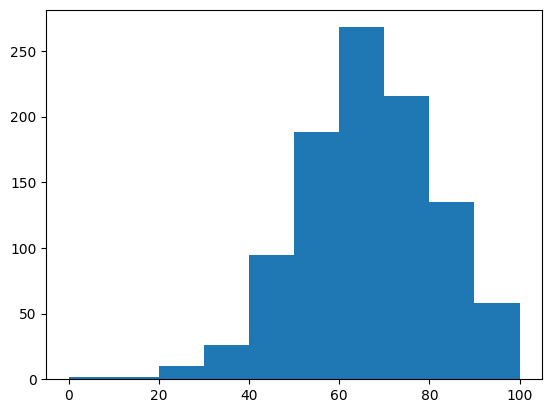

In [47]:
import matplotlib.pyplot as mps;

mps.hist(data['math score'])


<Axes: xlabel='race/ethnicity', ylabel='count'>

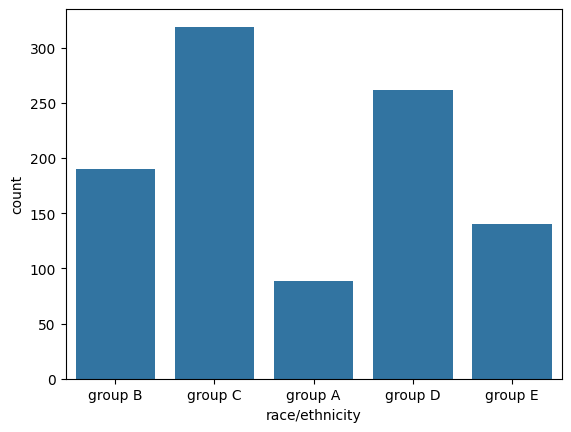

In [60]:
import seaborn as sns;

sns.countplot(x=data['race/ethnicity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c05420071d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0542005c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0541f508d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0542004d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0542005990>],
 'means': []}

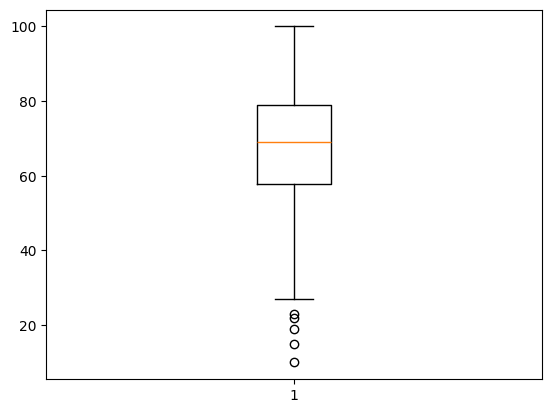

In [49]:
mps.boxplot(data['writing score'])

In [64]:
# Z-score
columns_to_check = ['math score', 'writing score']
z_score_threshold = 3

for col in columns_to_check:

    mean = data[col].mean()
    std_dev = data[col].std()

    if std_dev == 0:
        data[f'{col}_zscore'] = 0
    else:
        data[f'{col}_zscore'] = (data[col] - mean) / std_dev



# New section